# **Theoretical Questions**

**1. What is unsupervised learning?**

>Unsupervised learning finds hidden patterns or groupings in unlabeled data without predefined outputs.


**2. How does K-Means clustering algorithm work?**

> K-Means partitions data into K clusters by minimizing the distance between data points and their cluster centroids iteratively.


**3. What is a dendrogram in hierarchical clustering?**
>A dendrogram is a tree-like diagram that shows how clusters are merged or split at different levels of similarity.


**4. Main difference between K-Means and Hierarchical Clustering?**
>K-Means requires a predefined number of clusters, while hierarchical clustering builds a hierarchy without needing K upfront.


**5. Advantages of DBSCAN over K-Means?**
> DBSCAN can find arbitrarily shaped clusters, doesn’t need K, and can identify noise/outliers.


**6. When would you use Silhouette Score?**
>Use it to evaluate clustering quality by measuring how well points fit within their clusters versus others.


**7. Limitations of Hierarchical Clustering?**
> It’s computationally expensive and sensitive to noise and outliers; once merged, clusters can’t be undone.


**8. Why is feature scaling important in K-Means?**
> Because K-Means uses distance metrics—unscaled features can dominate and distort clustering.


**9. How does DBSCAN identify noise points?**
>Points not belonging to any dense region (i.e., not within eps distance of enough neighbors) are labeled as noise.


**10. Define inertia in K-Means.**
>Inertia is the sum of squared distances between each data point and its assigned cluster centroid.


**11. What is the elbow method in K-Means?**
>A technique to find the optimal K by plotting inertia vs. K and looking for the “elbow” point where improvement slows.


**12. Describe “density” in DBSCAN.**
>Density is defined by the number of points within a specified radius (eps).



**13. Can hierarchical clustering be used on categorical data?**
>Yes, but it requires an appropriate distance metric (e.g., Eucledian distance).



**14. What does a negative Silhouette Score indicate?**
>It indicates that a point is likely misclassified—closer to another cluster than its own.


**15. Explain “linkage criteria” in hierarchical clustering.**
>It determines how distances between clusters are measured (e.g., single, complete, average linkage).



**16. Why might K-Means perform poorly on varying cluster sizes/densities?**
>Because it assumes clusters are spherical and of similar size and density.



**17. Core parameters in DBSCAN and their influence?**

* eps: defines neighborhood radius.

* min_samples: minimum points to form a dense region.
They control cluster density and sensitivity to noise.



**18. How does K-Means++ improve initialization?**
>It spreads initial centroids apart to improve convergence and avoid poor clustering.



**19. What is agglomerative clustering?**
> A bottom-up hierarchical method that starts with individual points and merges them iteratively.



**20. Why is Silhouette Score better than inertia?**
>It considers both cohesion and separation, giving a more reliable measure of clustering quality.

# **Practical Questions**

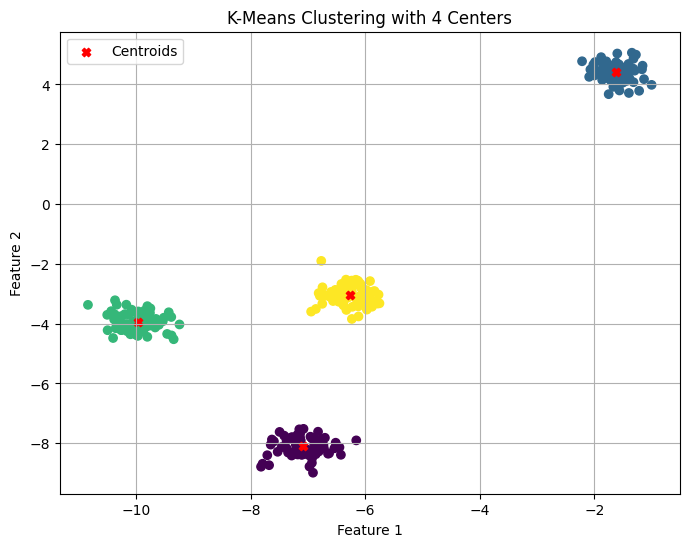

In [6]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


n_samples = 300
random_state = 42
X, y_true = make_blobs(n_samples=n_samples, centers=4, cluster_std=0.30, random_state=1)


kmeans = KMeans(n_clusters=4, random_state=random_state, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In [7]:
#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data  # Features of the Iris dataset

agg_clustering = AgglomerativeClustering(n_clusters=3)

predicted_labels = agg_clustering.fit_predict(X)

print("First 10 predicted labels:")
print(predicted_labels[:10])

First 10 predicted labels:
[1 1 1 1 1 1 1 1 1 1]


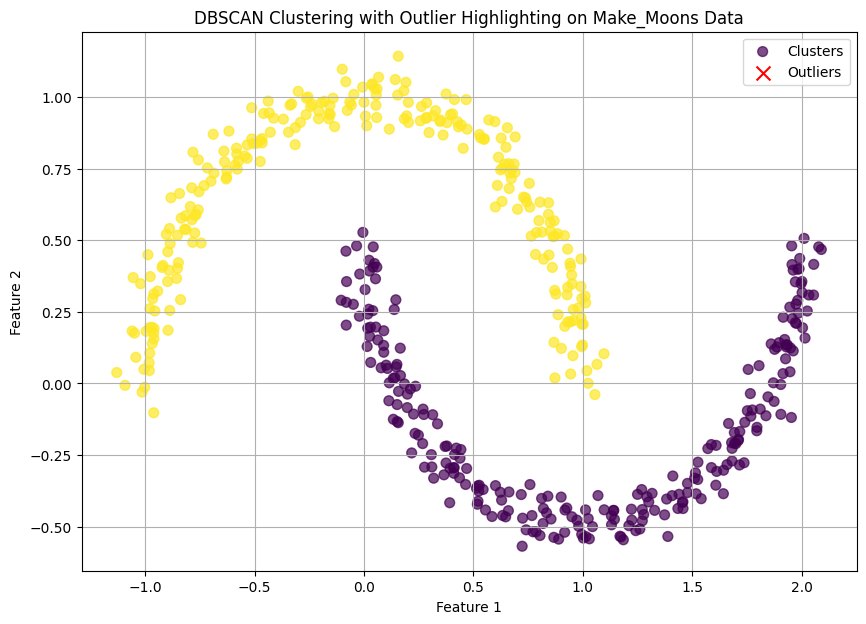

In [9]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic data using make_moons
n_samples = 500
noise_level = 0.05  # Adjust noise to introduce more or fewer outliers
X, y = make_moons(n_samples=n_samples, noise=noise_level, random_state=1)

# 2. Apply DBSCAN
# Epsilon (eps): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

dbscan = DBSCAN(eps=0.3, min_samples=10) # Adjust eps and min_samples for different results
clusters = dbscan.fit_predict(X)

# 3. Highlight outliers in the plot
# Outliers are identified by DBSCAN as points with a cluster label of -1
outliers = X[clusters == -1]
clustered_points = X[clusters != -1]
clustered_labels = clusters[clusters != -1]

plt.figure(figsize=(10, 7))

# Plot clustered points
scatter_clustered = plt.scatter(clustered_points[:, 0], clustered_points[:, 1],
                                c=clustered_labels, cmap='viridis', s=50, alpha=0.7, label='Clusters')

# Plot outliers
scatter_outliers = plt.scatter(outliers[:, 0], outliers[:, 1],
                              c='red', marker='x', s=100, label='Outliers')

plt.title('DBSCAN Clustering with Outlier Highlighting on Make_Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load the Wine dataset
wine_data = load_wine(as_frame=True)
X = wine_data.frame

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10)
kmeans.fit(X_scaled)

# 4. Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# 5. Add the cluster labels to the original DataFrame
X['cluster'] = cluster_labels

# 6. Print the size of each cluster
cluster_sizes = X.groupby('cluster').size()
print("Size of each cluster:")
print(cluster_sizes)


Size of each cluster:
cluster
0    61
1    49
2    68
dtype: int64


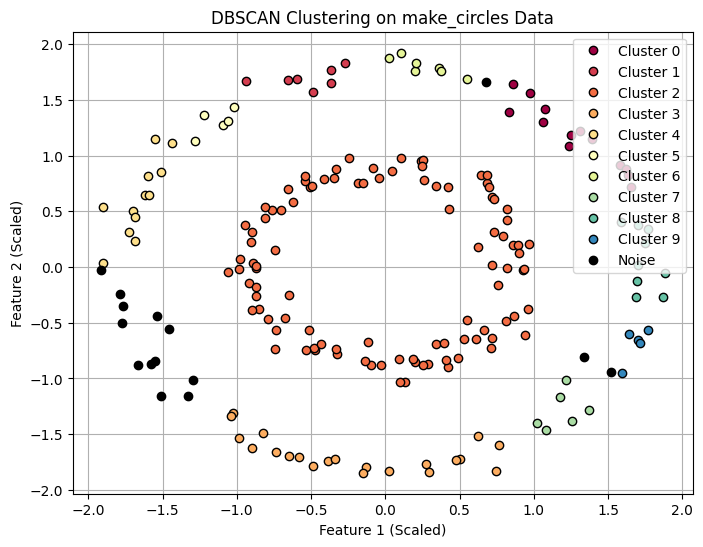

In [12]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Generate synthetic data using make_circles
X, _ = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN clustering

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 4. Plot the result
plt.figure(figsize=(8, 6))

# Get unique cluster labels, excluding noise (-1)
unique_labels = set(clusters)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (clusters == k)
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6, label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data

# 2. Apply MinMaxScaler for normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Use K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=1, n_init='auto')
kmeans.fit(X_scaled)

# 4. Output the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids (normalized):\n", centroids)

# Optional: To see the centroids in the original feature scale,
# inverse the transformation.
centroids_original_scale = scaler.inverse_transform(centroids)
print("\nCluster Centroids (original scale):\n", centroids_original_scale)

# Optional: Create a DataFrame to display the centroids with feature names
centroid_df = pd.DataFrame(centroids_original_scale, columns=breast_cancer.feature_names)
print("\nCluster Centroids (original scale) with feature names:\n", centroid_df)


Cluster Centroids (normalized):
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]

Cluster Centroids (original scale):
 [[1.76476720e+01 2.14079894e+01 1.16982381e+02 1.00107778e+03
  1.04679418e-01 1.57046190e-01 1.78567407e-01 9.44192063e-02
  1.96881481e-01 6.41783069e-02 6.38755556e-01 1.22498307e+00
  4.55664550e+00 7.68664974e+01 7.01334392e-03 3.67241852e-0

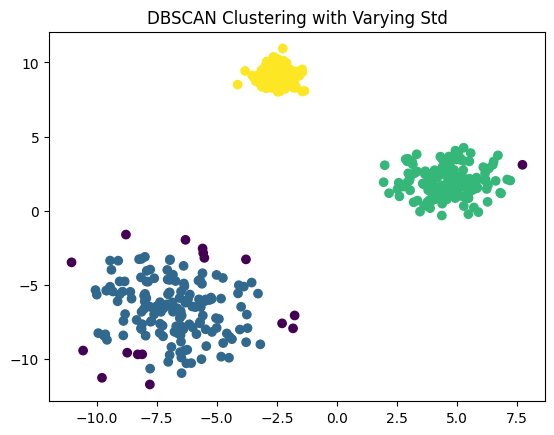

In [15]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 1.0, 2.0], random_state=42)

# Apply DBSCAN
db = DBSCAN(eps=1.0, min_samples=5).fit(X)
labels = db.labels_

# Plot
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering with Varying Std")
plt.show()


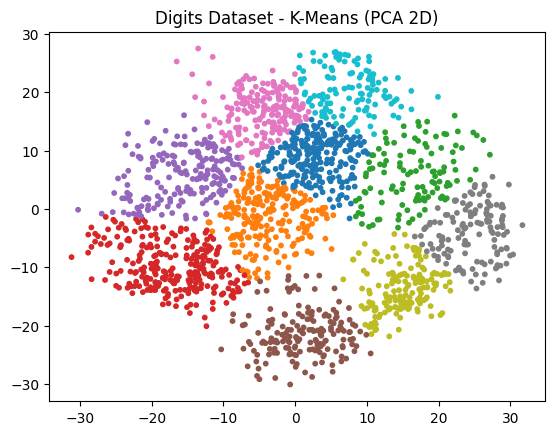

In [16]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = PCA(2).fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=42).fit(X)
labels = kmeans.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=10)
plt.title("Digits Dataset - K-Means (PCA 2D)")
plt.show()



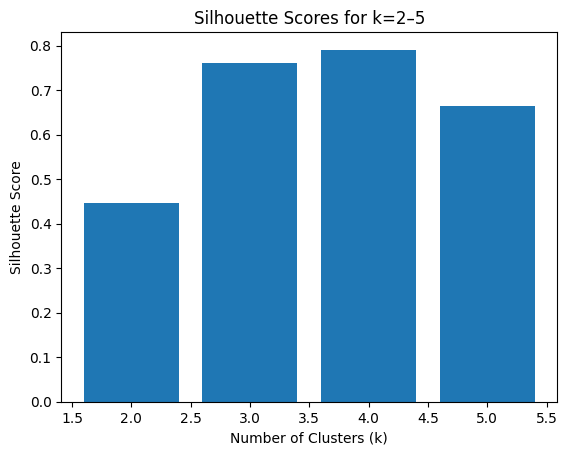

In [18]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores = []

for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=1).fit(X)
    scores.append(silhouette_score(X, km.labels_))

plt.bar(range(2, 6), scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k=2–5")
plt.show()


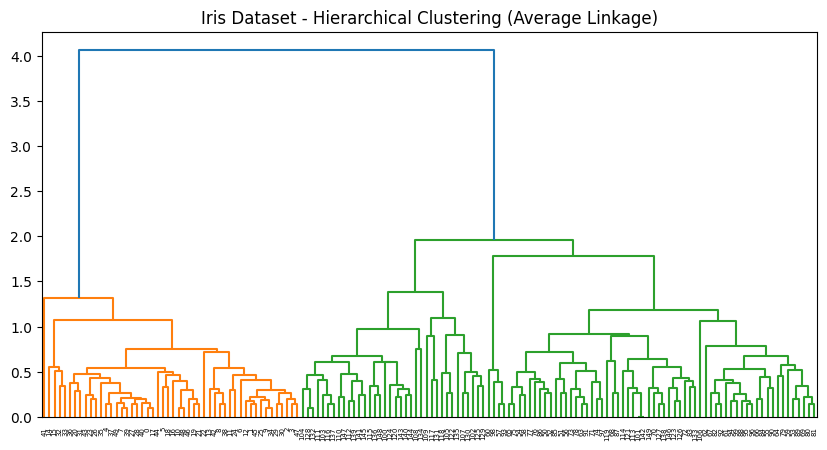

In [19]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

X = load_iris().data
Z = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Iris Dataset - Hierarchical Clustering (Average Linkage)")
plt.show()



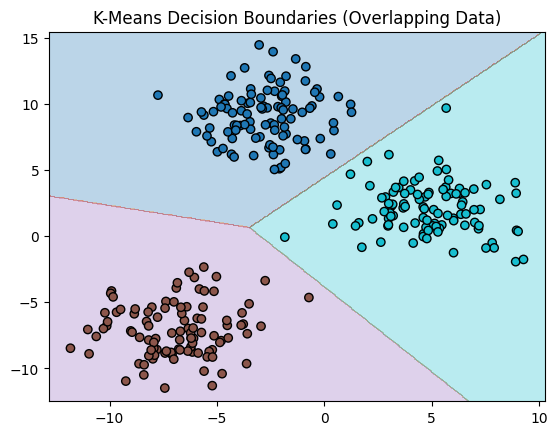

In [20]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Decision boundaries
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='tab10', edgecolor='k')
plt.title("K-Means Decision Boundaries (Overlapping Data)")
plt.show()


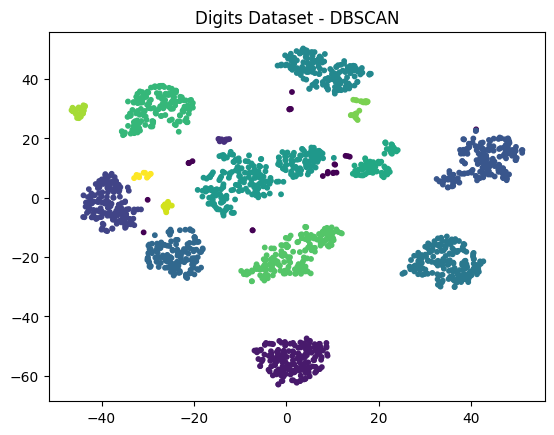

In [21]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X = load_digits().data
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

db = DBSCAN(eps=3, min_samples=10).fit(X_embedded)
labels = db.labels_

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, s=10)
plt.title("Digits Dataset - DBSCAN")
plt.show()


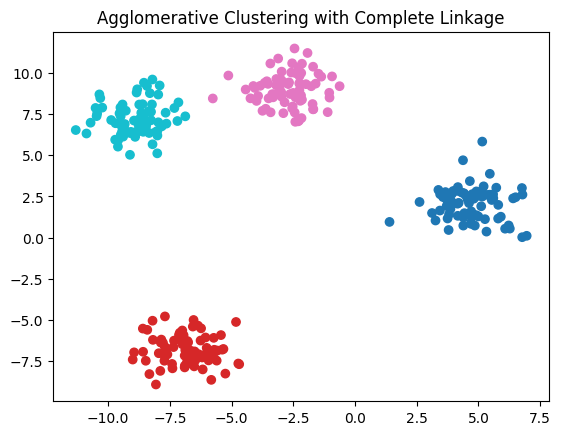

In [22]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap='tab10')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()


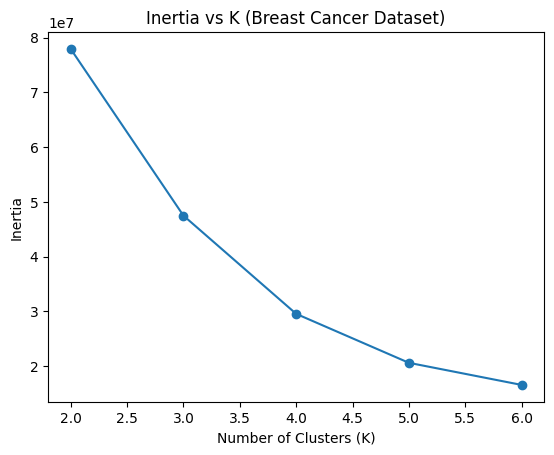

In [23]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = load_breast_cancer().data
inertias = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Inertia vs K (Breast Cancer Dataset)")
plt.show()


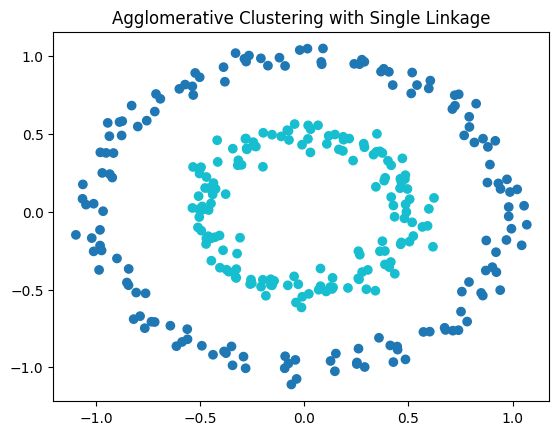

In [24]:
#35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap='tab10')
plt.title("Agglomerative Clustering with Single Linkage")
plt.show()


In [28]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load and scale data
X = load_wine().data
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels = db.labels_

print("Lables: \n")
print(labels)

# Count clusters (excluding noise = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Lables: 

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Number of clusters (excluding noise): 0


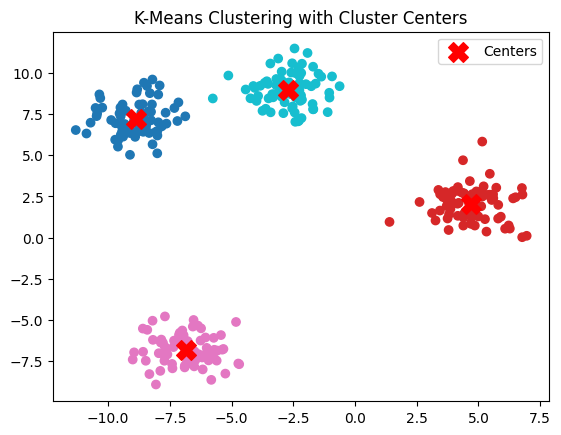

In [29]:
#37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=1).fit(X)
centers = kmeans.cluster_centers_

# Plot
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='tab10')
plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=200, label='Centers')
plt.legend()
plt.title("K-Means Clustering with Cluster Centers")
plt.show()


In [32]:
#38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load and scale
X = load_iris().data
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.6, min_samples=5).fit(X_scaled)
labels = db.labels_

print("Lables:\n")
print(labels)

# Count noise points
noise_count = np.sum(labels == -1)
print("Number of noise samples:", noise_count)


Lables:

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Number of noise samples: 26


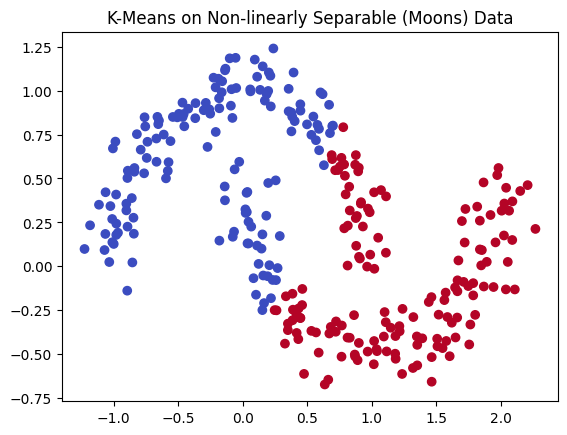

In [33]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate non-linear data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='coolwarm')
plt.title("K-Means on Non-linearly Separable (Moons) Data")
plt.show()


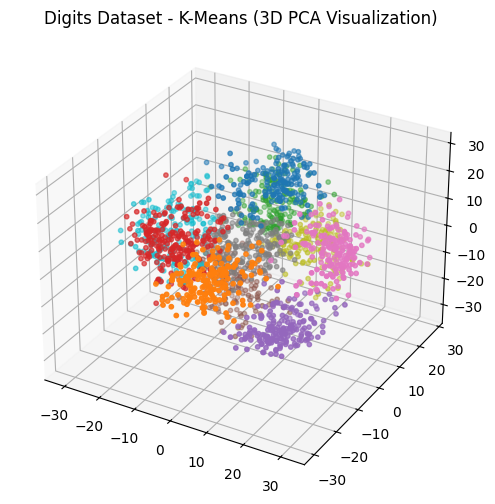

In [34]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# Load and reduce to 3D
X = load_digits().data
X_pca = PCA(n_components=3, random_state=42).fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
labels = kmeans.labels_

# 3D visualization
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels, cmap='tab10', s=10)
ax.set_title("Digits Dataset - K-Means (3D PCA Visualization)")
plt.show()
